https://towardsdatascience.com/modern-gaussian-process-regression-9c5196ca87ab

In [18]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, DotProduct, RBF
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# Random seeds
np.random.seed(seed=0)  # Set seed for NumPy
random_state = 0

In [20]:
# Generate features, and take norm for use with target
x = np.random.normal(loc=0, scale=1, size=(50, 1))
y = np.sin(x)

In [22]:
y

array([[ 0.9813841 ],
       [ 0.38956314],
       [ 0.82979374],
       [ 0.78376151],
       [ 0.95628847],
       [-0.82897801],
       [ 0.81346693],
       [-0.15077996],
       [-0.10303566],
       [ 0.39915816],
       [ 0.14354597],
       [ 0.99321889],
       [ 0.68967325],
       [ 0.12137501],
       [ 0.42943154],
       [ 0.3275169 ],
       [ 0.99705867],
       [-0.20372211],
       [ 0.30797867],
       [-0.75397722],
       [-0.55519952],
       [ 0.60806314],
       [ 0.76072944],
       [-0.67588513],
       [ 0.76551286],
       [-0.99322961],
       [ 0.04574255],
       [-0.18609268],
       [ 0.99927744],
       [ 0.99485962],
       [ 0.15432816],
       [ 0.36921344],
       [-0.77567617],
       [-0.91712077],
       [-0.34093579],
       [ 0.15571276],
       [ 0.94258592],
       [ 0.9328988 ],
       [-0.37771461],
       [-0.29771932],
       [-0.86670232],
       [-0.98865446],
       [-0.99083744],
       [ 0.9286724 ],
       [-0.48787366],
       [-0

In [23]:
# Create kernel and define GPR
kernel = RBF() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=random_state)

In [24]:
# Fit GPR model
gpr.fit(x, y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=RBF(length_scale=1) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=0)

In [25]:
# Create test data
x_test = np.random.normal(loc=0, scale=1, size=(50, 1))
y_test = np.sin(x_test)

In [26]:
# Predict mean
y_hat, y_sigma = gpr.predict(x_test, return_std=True)

In [27]:
# Squeeze data
x = np.squeeze(x)
y = np.squeeze(y)
x_test = np.squeeze(x_test)
y_test = np.squeeze(y_test)

In [29]:
y

array([ 0.9813841 ,  0.38956314,  0.82979374,  0.78376151,  0.95628847,
       -0.82897801,  0.81346693, -0.15077996, -0.10303566,  0.39915816,
        0.14354597,  0.99321889,  0.68967325,  0.12137501,  0.42943154,
        0.3275169 ,  0.99705867, -0.20372211,  0.30797867, -0.75397722,
       -0.55519952,  0.60806314,  0.76072944, -0.67588513,  0.76551286,
       -0.99322961,  0.04574255, -0.18609268,  0.99927744,  0.99485962,
        0.15432816,  0.36921344, -0.77567617, -0.91712077, -0.34093579,
        0.15571276,  0.94258592,  0.9328988 , -0.37771461, -0.29771932,
       -0.86670232, -0.98865446, -0.99083744,  0.9286724 , -0.48787366,
       -0.4241964 , -0.94986235,  0.70149307, -0.99907127, -0.21113919])

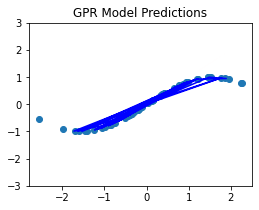

In [46]:
# Initialize plot
f, ax = plt.subplots(1, 1, figsize=(4, 3))

# Plot the training data
ax.scatter(x, y)

# Plot predictive means as blue line
ax.plot(x_test, y_hat, 'b')

# Shade between the lower and upper confidence bounds
lower = x_test - y_sigma
upper = x_test + y_sigma
ax.fill_between(x_test, lower, upper, alpha=0.5)
ax.set_ylim([-3, 3])
plt.title("GPR Model Predictions")
plt.show()